## **Explanatory Data Analysis**

This section includes the essential visualizations and insights from the exploratory data analysis.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import numpy as np

## **Pre Modifications**

### 1. Features used and number of samples

In [4]:
df = pd.read_csv("data/output_data.csv")
df = df.drop(columns=[df.columns[0]]) #Dropping ID column

print(df.columns)
print("-------------------------------")
print(df.shape)
print("-------------------------------")

Index(['systolic', 'eyesight(left)', 'hearing(right)', 'ALT', 'relaxation',
       'Cholesterol', 'serum creatinine', 'AST', 'Gtp', 'hearing(left)',
       'smoking'],
      dtype='object')
-------------------------------
(159256, 11)
-------------------------------


### 2. Histogram

array([[<Axes: title={'center': 'systolic'}>,
        <Axes: title={'center': 'eyesight(left)'}>,
        <Axes: title={'center': 'hearing(right)'}>],
       [<Axes: title={'center': 'ALT'}>,
        <Axes: title={'center': 'relaxation'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'serum creatinine'}>,
        <Axes: title={'center': 'AST'}>, <Axes: title={'center': 'Gtp'}>],
       [<Axes: title={'center': 'hearing(left)'}>,
        <Axes: title={'center': 'smoking'}>, <Axes: >]], dtype=object)

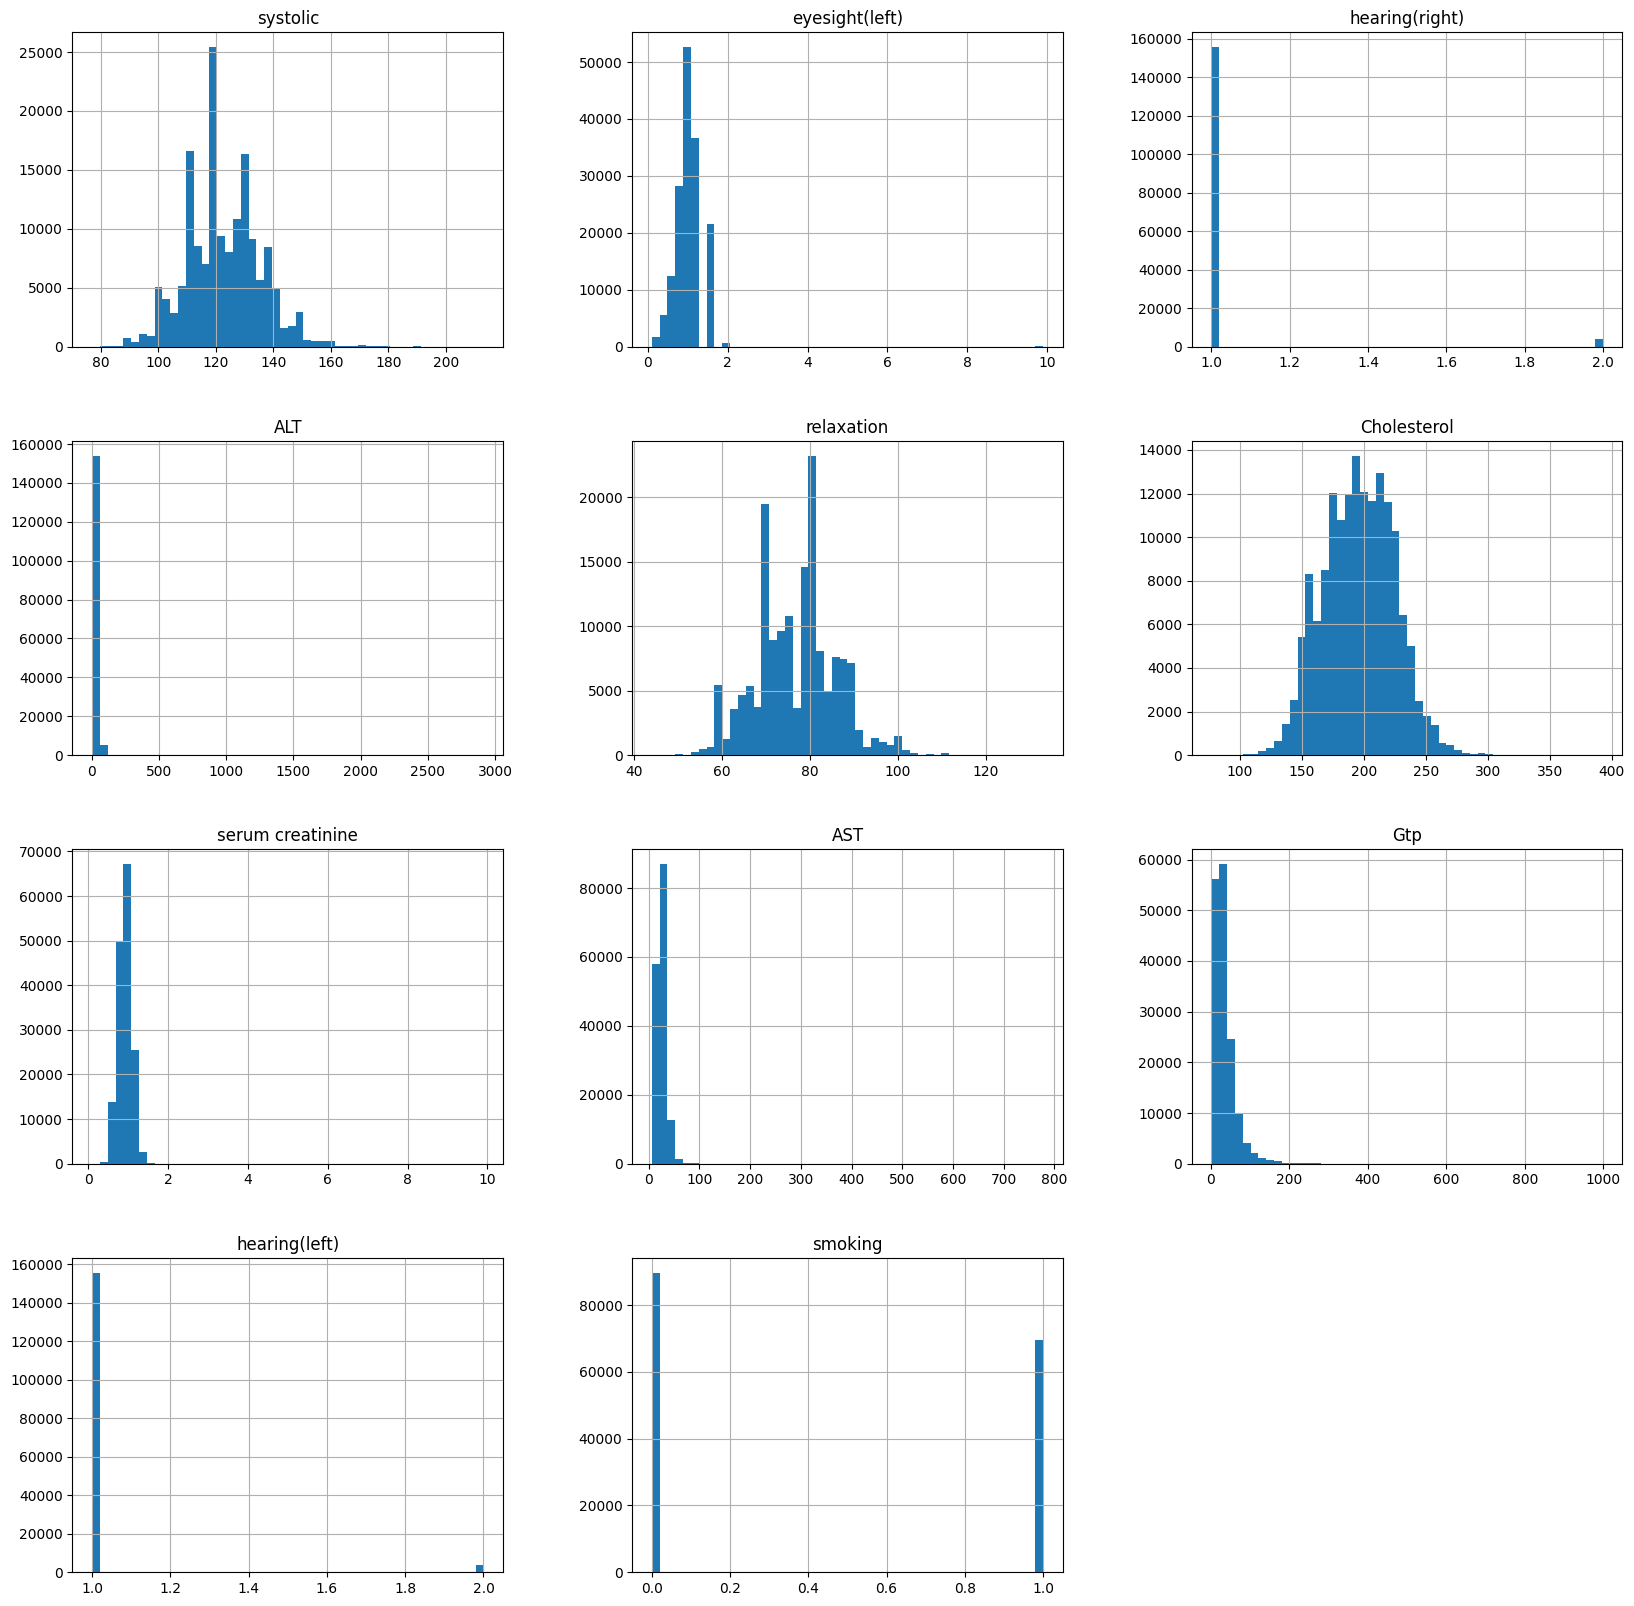

In [5]:
df.hist(bins=50, figsize=(20,20))

## **Post Modifications**

**1. Converting to categorical features**

In [7]:
print(df.dtypes)
df['smoking'] = df['smoking'].astype('category')
df['hearing(left)'] = df['hearing(left)'].astype('category')
df['hearing(right)'] = df['hearing(right)'].astype('category')

systolic               int64
eyesight(left)       float64
hearing(right)      category
ALT                    int64
relaxation             int64
Cholesterol            int64
serum creatinine     float64
AST                    int64
Gtp                    int64
hearing(left)       category
smoking             category
dtype: object


**2. Correlation between features**

A correlation matrix helps identify potential multicollinearity between features. If two features are highly correlated, it may indicate that one feature is redundant and could be dropped. This is important because multicollinearity can negatively impact models like linear regression and logistic regression.

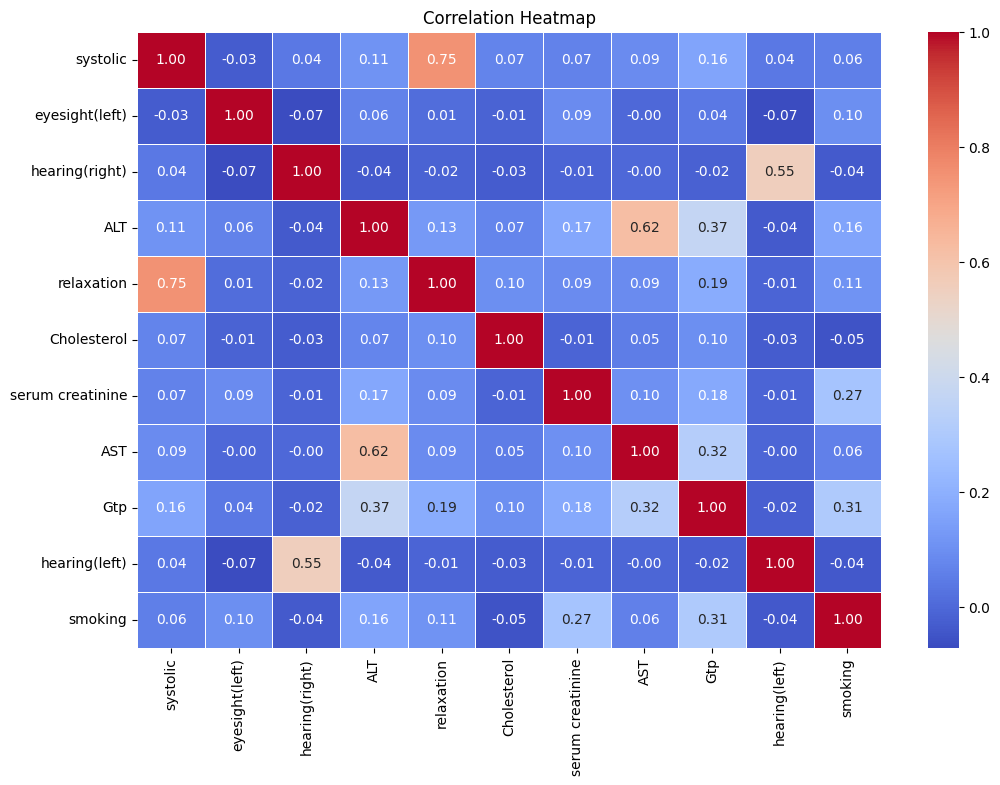

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**3. Removing Outliers**

Outliers can significantly affect model performance, especially for models that are sensitive to extreme values (ex. linear regression). Therefore, detecting and removing outliers is an important step in the preprocessing pipeline.

In [9]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
z_scores = st.zscore(numerical_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keep rows where Z-score is < 3
df = df[filtered_entries]  # Filter out outliers


array([[<Axes: title={'center': 'systolic'}>,
        <Axes: title={'center': 'eyesight(left)'}>,
        <Axes: title={'center': 'ALT'}>],
       [<Axes: title={'center': 'relaxation'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'serum creatinine'}>],
       [<Axes: title={'center': 'AST'}>, <Axes: title={'center': 'Gtp'}>,
        <Axes: >]], dtype=object)

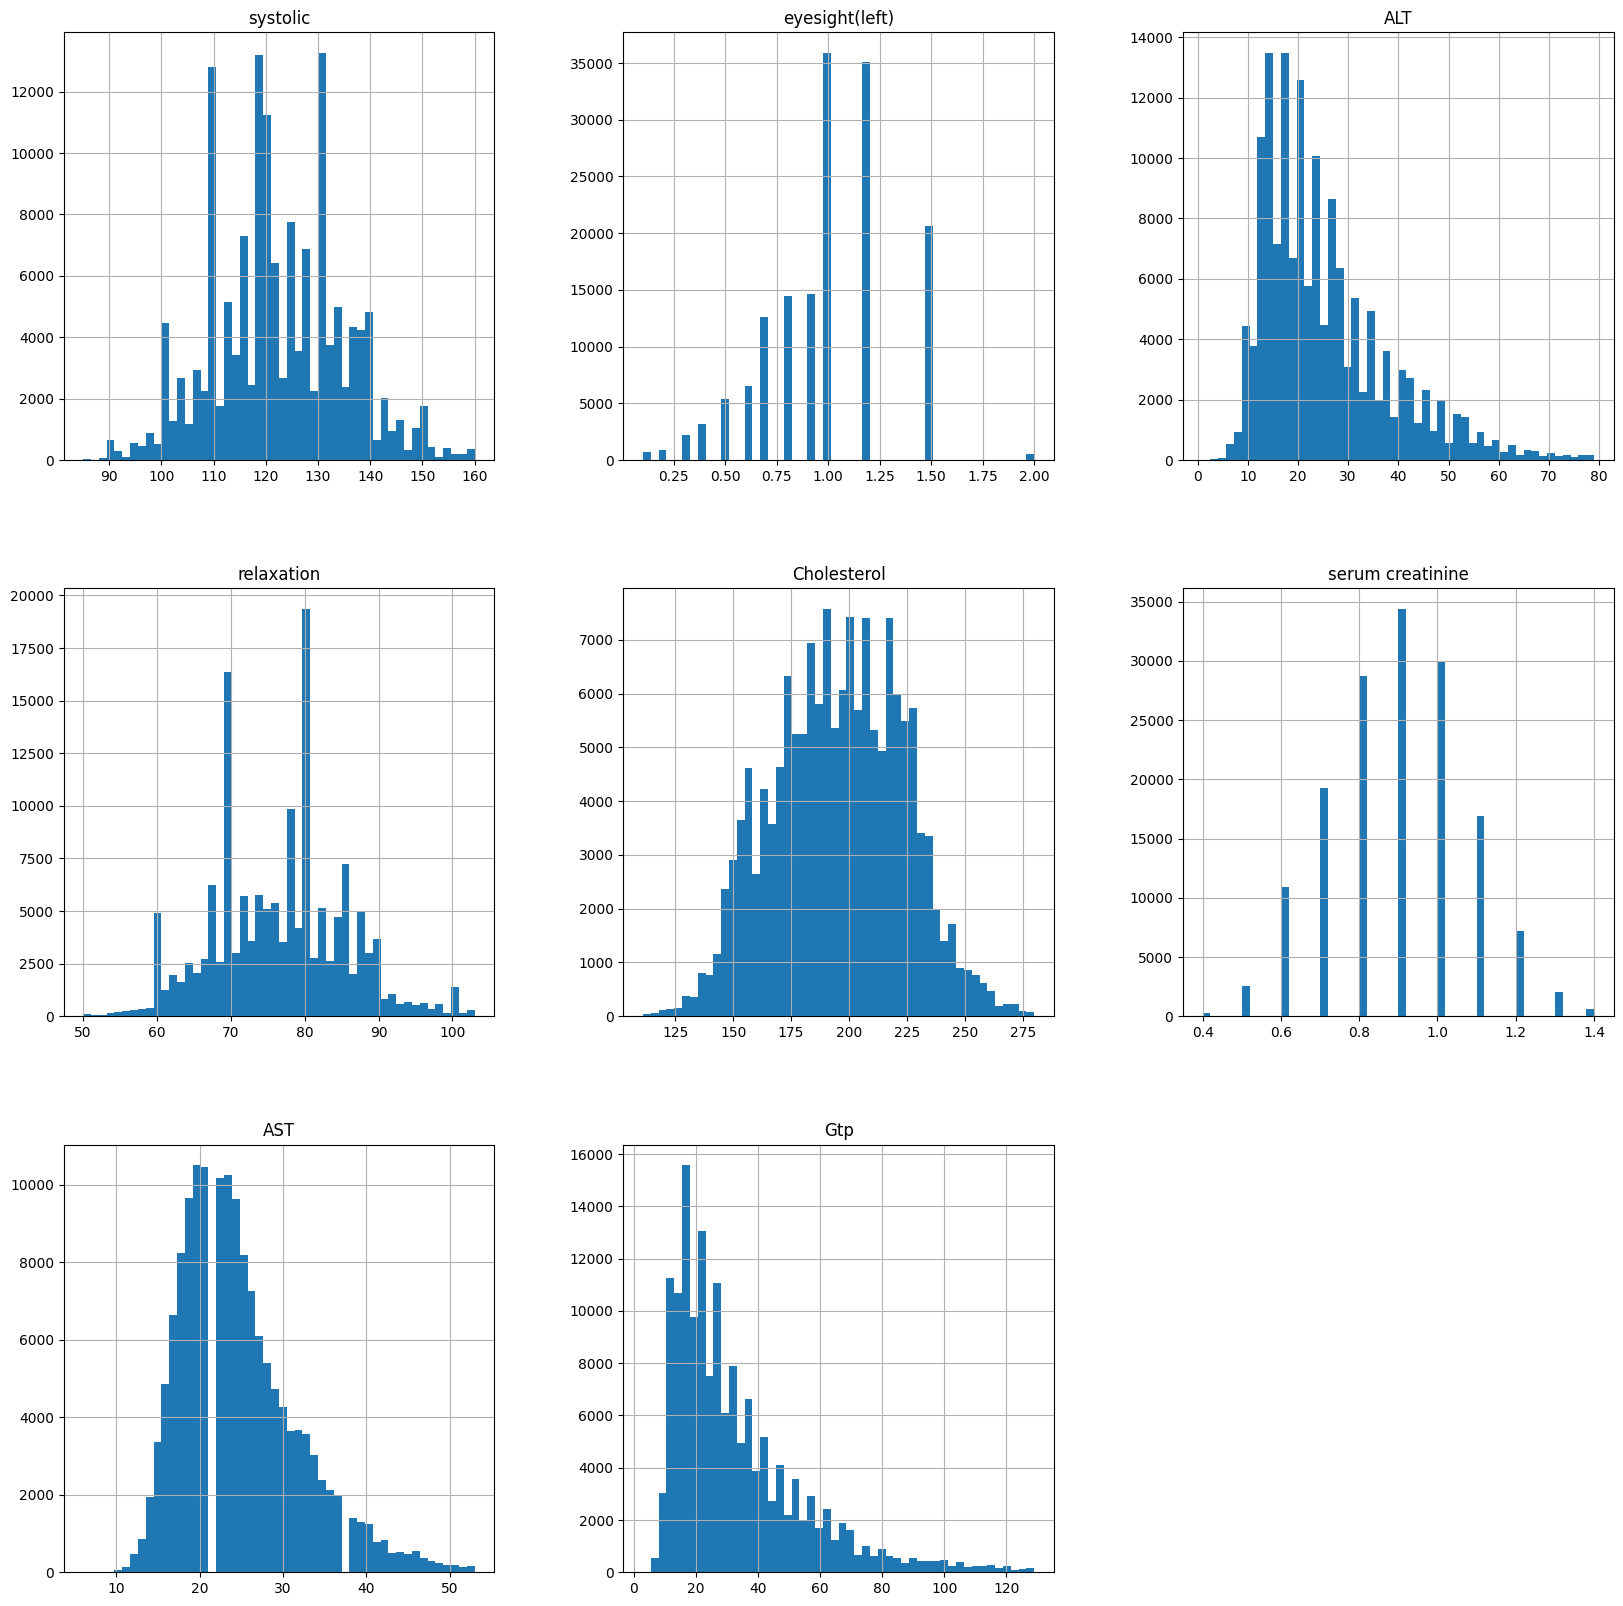

In [10]:
df.hist(bins=50, figsize=(20,20))

**4. Applying Standardization**

In [11]:
scaler = StandardScaler()
df[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

array([[<Axes: title={'center': 'systolic'}>,
        <Axes: title={'center': 'eyesight(left)'}>,
        <Axes: title={'center': 'ALT'}>],
       [<Axes: title={'center': 'relaxation'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'serum creatinine'}>],
       [<Axes: title={'center': 'AST'}>, <Axes: title={'center': 'Gtp'}>,
        <Axes: >]], dtype=object)

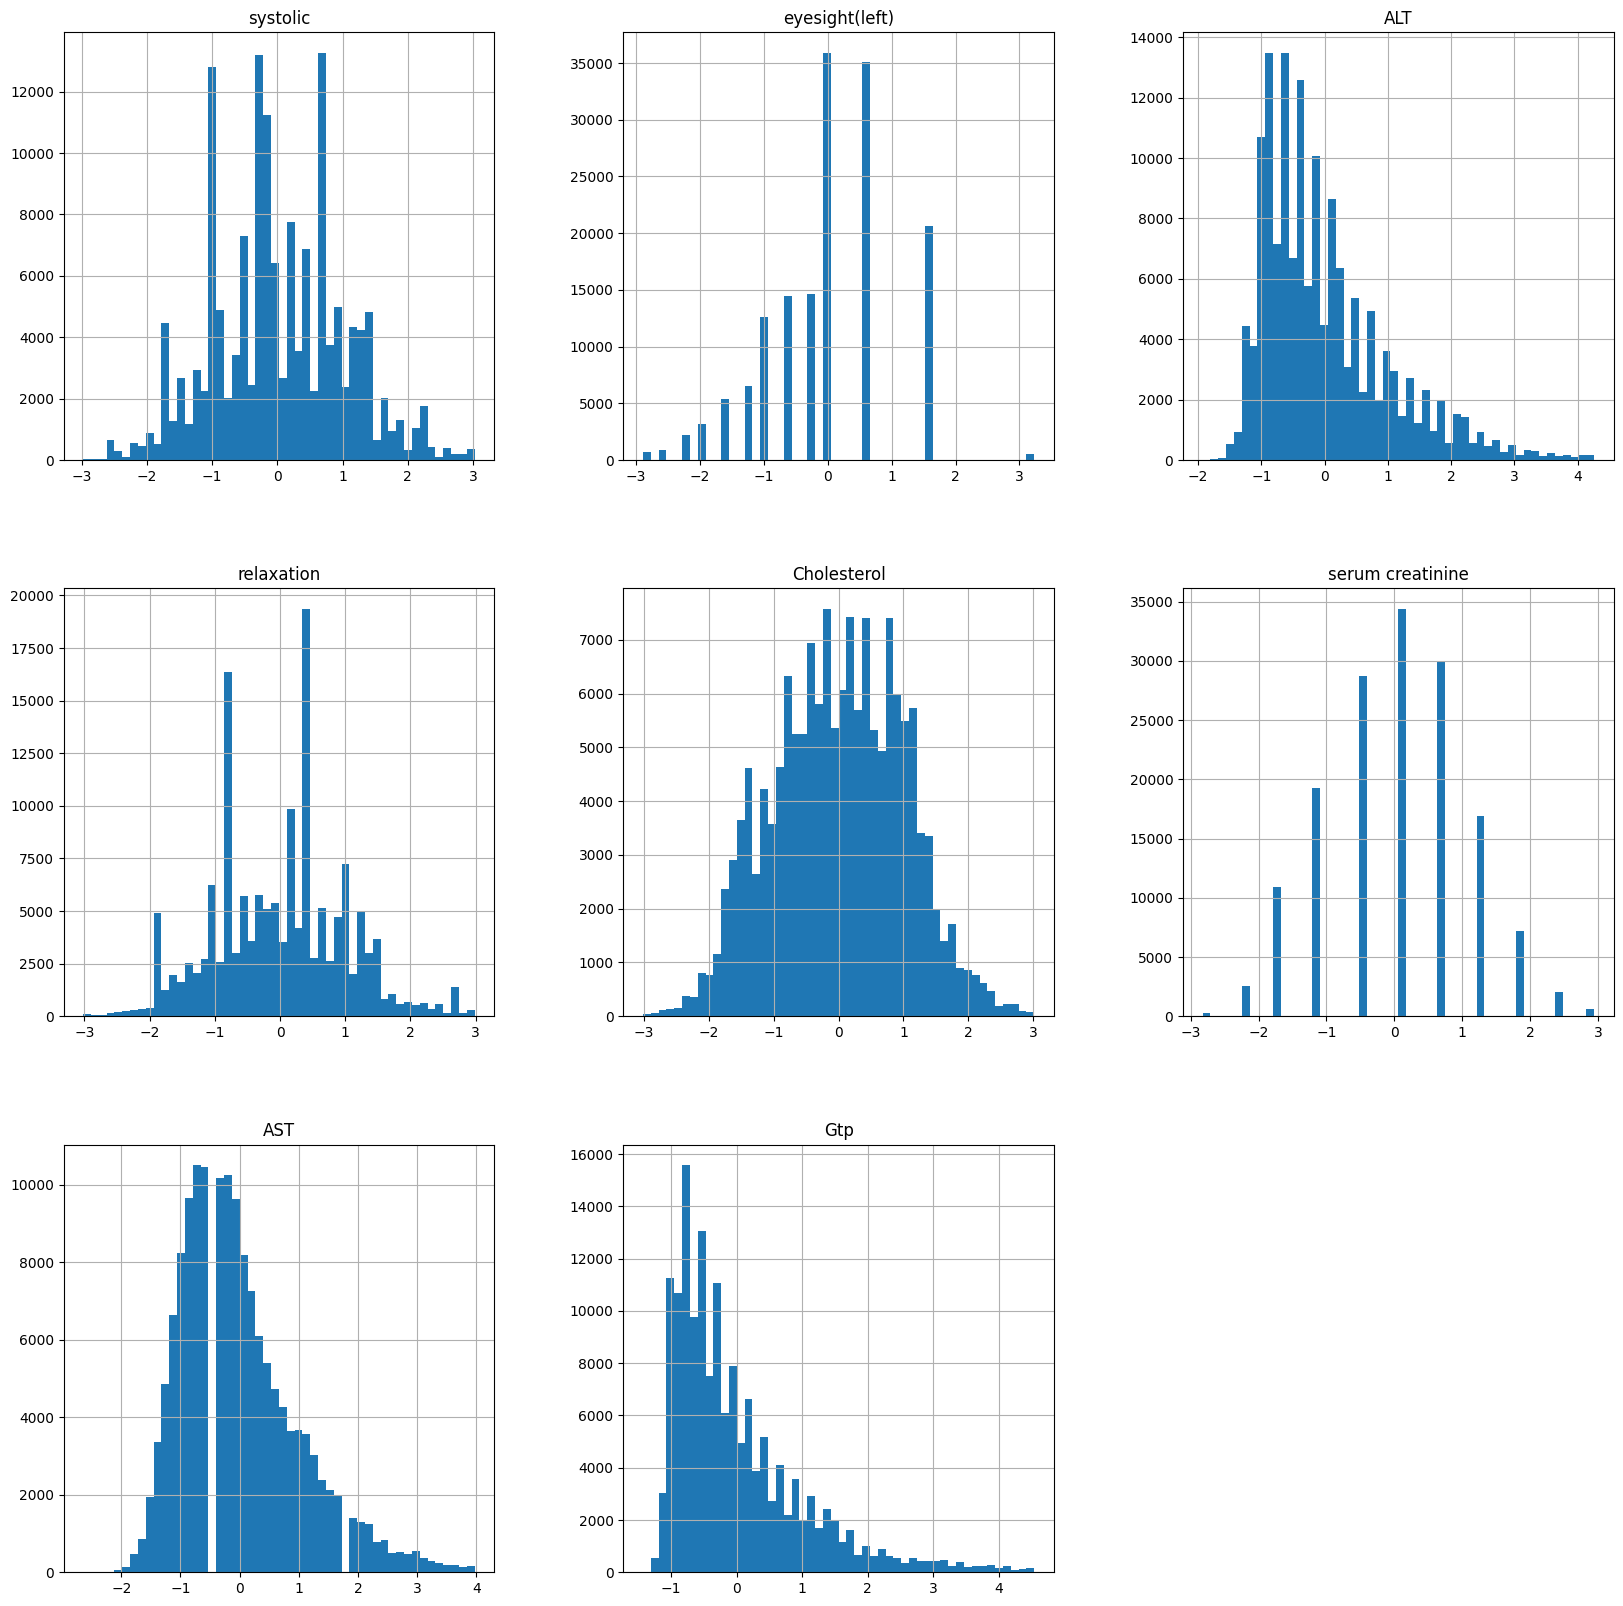

In [12]:
df.hist(bins=50, figsize=(20,20))

**5. Polynomial Feature Creation and Dropping**

In [ ]:
selected_features = df[['serum creatinine', 'Gtp']].copy()

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(selected_features)
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(selected_features.columns))

# Drop the original features and add the polynomial features back to the original dataframe
df_poly = df.drop(['serum creatinine', 'Gtp'], axis=1)

# Add the polynomial features back
df_poly = pd.concat([df_poly, poly_df], axis=1)

df_poly = df_poly.drop(columns=['serum creatinine Gtp'])
